In [36]:
import pandas as pd
df = pd.read_excel("./Scored data_abridged_25 March.xlsx")
df

,Owner Group,Notes,s1_etr,s1_etr_time,s1_svc_rstr,s1_no_prob,s1_hold,s1_cd
0,Global Premium Desk,"Dear Customer,\n\nPlease confirm the current l...",0.0,0,0,0,0.0,1.0
1,Global Premium Desk,"Dear Customer,\n\nPlease check and confirm; be...",0.0,0,0,0,0.0,1.0
2,Global Premium Desk,"Dear Customer, \n\nPlease check and confirm; b...",0.0,0,0,0,0.0,1.0
3,Global Premium Desk,"Dear Customer, \n\nPlease check and confirm; b...",0.0,0,0,0,0.0,1.0
4,Premium SOC,"Dear Harish,\n\nAs discussed over call, we are...",0.0,0,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
144,Service Provider_Premium,"Dear Customer, \nPlease note as this is high p...",0.0,0,1,0,0.0,1.0
145,Service Provider_Premium,"Dear Team,\n\nWe are observing alarm is showin...",0.0,0,1,0,0.0,1.0
146,Global Premium Desk,"Hi Sunildutt,\n\nMain path is UP and stable.\n...",0.0,0,1,0,0.0,0.0
147,Global Premium Desk,"Dear Customer,\n\nPlease find below observatio...",1.0,6 hours,1,1,1.0,0.0


In [ ]:
df['Text'] = df['Notes'].apply(lambda x:x.replace('\n', ' ')) 

In [ ]:
df['labels'] = [list(x) for x in list(zip(df.s1_etr.tolist(), df.s1_no_prob.tolist(), df.s1_hold.tolist(), df.s1_cd.tolist(), df.s1_svc_rstr.tolist()))]

In [9]:
df.head()

,Owner Group,Notes,s1_etr,s1_etr_time,s1_svc_rstr,s1_no_prob,s1_hold,s1_cd,Text,labels
0,Global Premium Desk,"Dear Customer,\n\nPlease confirm the current l...",0.0,0,0,0,0.0,1.0,"Dear Customer, Please confirm the current lat...","[0.0, 0, 0.0, 1.0, 0]"
1,Global Premium Desk,"Dear Customer,\n\nPlease check and confirm; be...",0.0,0,0,0,0.0,1.0,"Dear Customer, Please check and confirm; betw...","[0.0, 0, 0.0, 1.0, 0]"
2,Global Premium Desk,"Dear Customer, \n\nPlease check and confirm; b...",0.0,0,0,0,0.0,1.0,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]"
3,Global Premium Desk,"Dear Customer, \n\nPlease check and confirm; b...",0.0,0,0,0,0.0,1.0,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]"
4,Premium SOC,"Dear Harish,\n\nAs discussed over call, we are...",0.0,0,0,0,0.0,1.0,"Dear Harish, As discussed over call, we are n...","[0.0, 0, 0.0, 1.0, 0]"


In [22]:
df.isna().sum()

Owner Group    0
Notes          0
s1_etr         1
s1_etr_time    2
s1_svc_rstr    0
s1_no_prob     0
s1_hold        6
s1_cd          1
dtype: int64

In [31]:
list(set(list(df['s1_etr'])))[2]

nan

In [41]:
df = df.dropna()

In [37]:
df[df.isna().any(axis=1)]

,Owner Group,Notes,s1_etr,s1_etr_time,s1_svc_rstr,s1_no_prob,s1_hold,s1_cd
91,Global Premium Desk,"Dear Customer, \n\nWe are checking with our in...",1.0,90 Mins,0,0,NaN,0.0
103,Global Premium Desk,\n\n\n\n\nVCG-1-7-101\nStart Time\tEnd Time\tI...,0.0,0,0,0,NaN,0.0
106,Global Premium Desk,"Dear Customer,\n\nWe didn't observing any abno...",NaN,NaN,1,1,NaN,1.0
115,Global Premium Desk,"Dear Customer, \n\nWe are not observing frames...",0.0,0,0,0,NaN,1.0
121,Global Premium Desk,"Dear Customer, \n\nWe have softly rebooted ETH...",0.0,0,0,0,NaN,1.0
128,Global Premium Desk,"Dear Customer,\n\nWe are observing the link is...",0.0,NaN,1,1,NaN,NaN


In [48]:
df.shape

(143, 10)

In [50]:
df.isnull().sum()

Owner Group    0
Notes          0
s1_etr         0
s1_etr_time    0
s1_svc_rstr    0
s1_no_prob     0
s1_hold        0
s1_cd          0
Text           0
labels         0
dtype: int64

In [43]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [44]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [51]:
new_df = df[['Text', 'labels']].copy()
new_df.head()

,Text,labels
0,"Dear Customer, Please confirm the current lat...","[0.0, 0, 0.0, 1.0, 0]"
1,"Dear Customer, Please check and confirm; betw...","[0.0, 0, 0.0, 1.0, 0]"
2,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]"
3,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]"
4,"Dear Harish, As discussed over call, we are n...","[0.0, 0, 0.0, 1.0, 0]"


In [53]:
train_encodings = tokenizer(list(new_df['Text']), truncation=True, padding=True)

In [54]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, list(new_df['labels']))

In [55]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [56]:
from tqdm import tqdm
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.train().to(device)
optimizer = torch.optim.AdamW(params=model.parameters(), lr=1e-5)
for epoch in range(3):
    for i, batch in enumerate(tqdm(train_loader)):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs[0]
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if i % 10 == 0:
            print(f"loss: {loss}")

  6%|▌         | 1/18 [00:01<00:27,  1.60s/it]

loss: 0.693056046962738


 61%|██████    | 11/18 [00:08<00:05,  1.37it/s]

loss: 0.6045651435852051


  6%|▌         | 1/18 [00:00<00:12,  1.33it/s]

loss: 0.6937540769577026


 61%|██████    | 11/18 [00:08<00:05,  1.36it/s]

loss: 0.5735995173454285


  6%|▌         | 1/18 [00:00<00:13,  1.30it/s]

loss: 0.6097437143325806


 61%|██████    | 11/18 [00:08<00:05,  1.34it/s]

loss: 0.46721577644348145


100%|██████████| 18/18 [00:13<00:00,  1.35it/s]


In [121]:
tk = torch.tensor(tokenizer.encode(new_df['Text'][0]))

In [122]:
logits = model(tk.unsqueeze(0).to(device))

In [123]:
torch.tensor(logits.logits.detach().cpu().numpy())

tensor([[-0.9635, -0.3473, -0.9569,  0.1554, -0.9816]])

In [124]:
x = logits.logits.detach().cpu().numpy()

In [125]:
torch.softmax(torch.tensor(x), dim=-1)

tensor([[0.1266, 0.2344, 0.1274, 0.3874, 0.1243]])

In [109]:
new_df[:1]['Text']

0    Dear Customer,  Please confirm the current lat...
Name: Text, dtype: object

In [110]:
new_df[:1]['labels']

0    [0.0, 0, 0.0, 1.0, 0]
Name: labels, dtype: object

In [150]:
li = []
for i in new_df['Text']:
    tk = torch.tensor(tokenizer.encode(i, truncation=True))
    logits = model(tk.unsqueeze(0).to(device))
    tk = (torch.softmax(torch.tensor(logits.logits.detach().cpu().numpy()), dim=-1)).tolist()[0]
    li.append([np.round(x, decimals=2) for x in tk])

In [ ]:
df['Predicted'] = li

In [154]:
new_df['Predicted'] = li

In [156]:
new_df.head()

,Text,labels,Predicted
0,"Dear Customer, Please confirm the current lat...","[0.0, 0, 0.0, 1.0, 0]","[0.1, 0.14, 0.06, 0.55, 0.14]"
1,"Dear Customer, Please check and confirm; betw...","[0.0, 0, 0.0, 1.0, 0]","[0.1, 0.13, 0.07, 0.58, 0.13]"
2,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]","[0.13, 0.18, 0.09, 0.47, 0.13]"
3,"Dear Customer, Please check and confirm; bet...","[0.0, 0, 0.0, 1.0, 0]","[0.09, 0.13, 0.08, 0.59, 0.11]"
4,"Dear Harish, As discussed over call, we are n...","[0.0, 0, 0.0, 1.0, 0]","[0.08, 0.15, 0.1, 0.57, 0.09]"


In [ ]:
df.s1_etr.tolist(), df.s1_no_prob.tolist(), df.s1_hold.tolist(), df.s1_cd.tolist(), df.s1_svc_rstr.tolist()

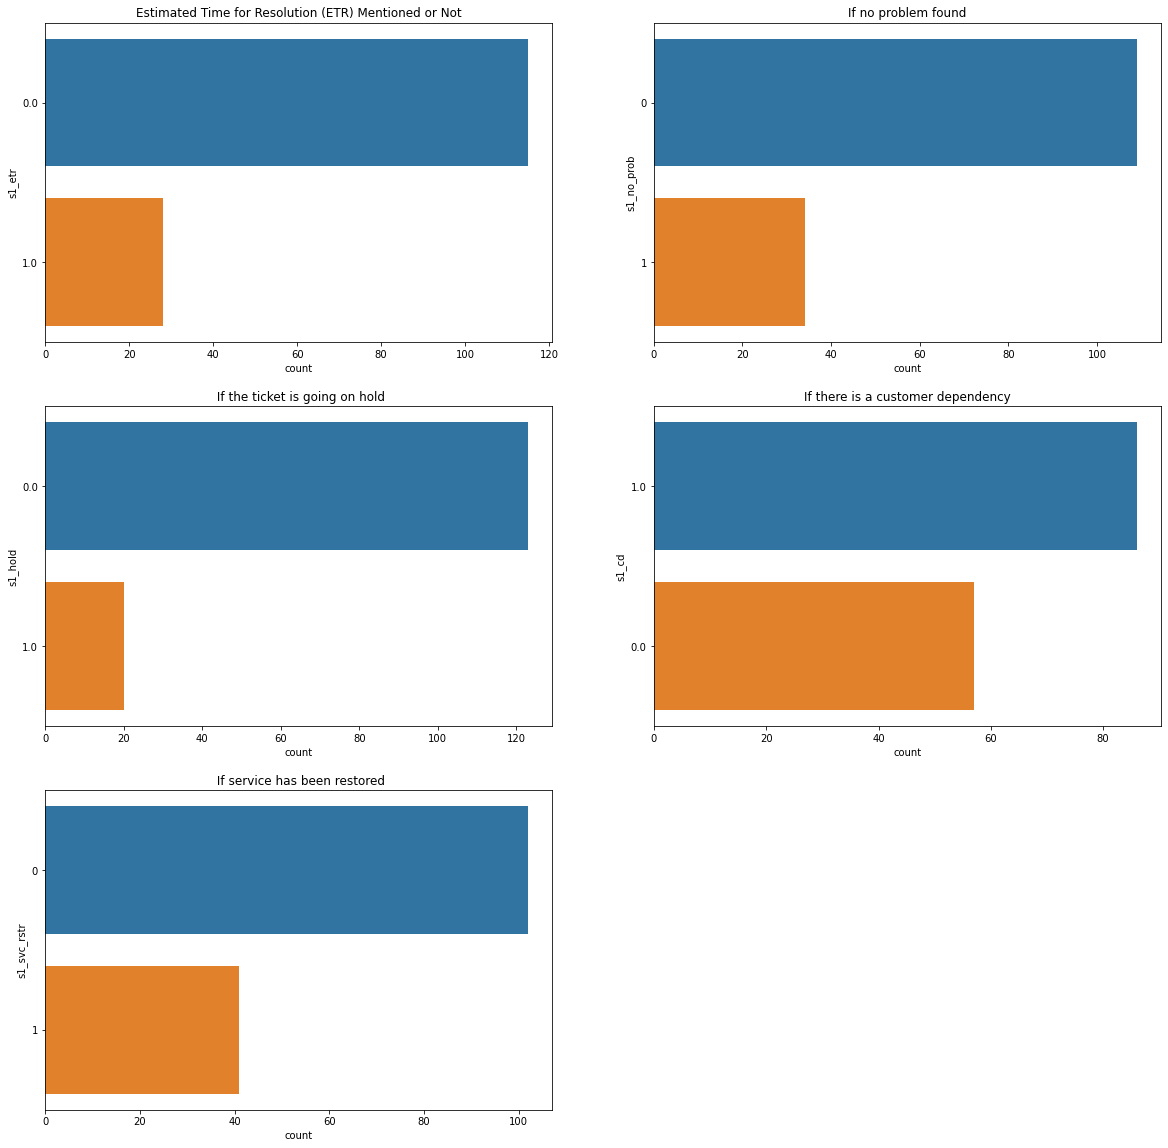

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
sns.countplot(y='s1_etr',data=df, ax = axs[0, 0], order=df.s1_etr.value_counts().iloc[
    0:19].index).set_title("Estimated Time for Resolution (ETR) Mentioned or Not")
sns.countplot(y='s1_no_prob',data=df, ax = axs[0, 1], order=df.s1_no_prob.value_counts().iloc[
    0:19].index).set_title("If no problem found")
sns.countplot(y='s1_hold',data=df, ax = axs[1, 0], order=df.s1_hold.value_counts().iloc[
    0:19].index).set_title(" If the ticket is going on hold")
sns.countplot(y='s1_cd',data=df, ax = axs[1, 1], order=df.s1_cd.value_counts().iloc[
    0:19].index).set_title("If there is a customer dependency")
sns.countplot(y='s1_svc_rstr',data=df, ax = axs[2, 0], order=df.s1_svc_rstr.value_counts().iloc[
    0:19].index).set_title(" If service has been restored")
axs[2][1].set_visible(False)

## Confusion Matrix for Multilabel Classifier

In [287]:
li = []
for x in list(new_df['Predicted']):
    z = []
    for i in range(len(x)):
        if(i==3):
            if(x[i]<0.48):
                z.append(0)
            else:
                z.append(1)
        elif(i==1):
            if(x[i]<0.3):
                z.append(0)
            else:
                z.append(1)
        else:
            if(x[i]<0.17):
                z.append(0)
            else:
                z.append(1)
    li.append(z)

In [219]:
tli = []
for x in list(new_df['labels']):
    tli.append([int(y) for y in x])

In [289]:
from sklearn.metrics import multilabel_confusion_matrix
matrix = multilabel_confusion_matrix(tli, li)

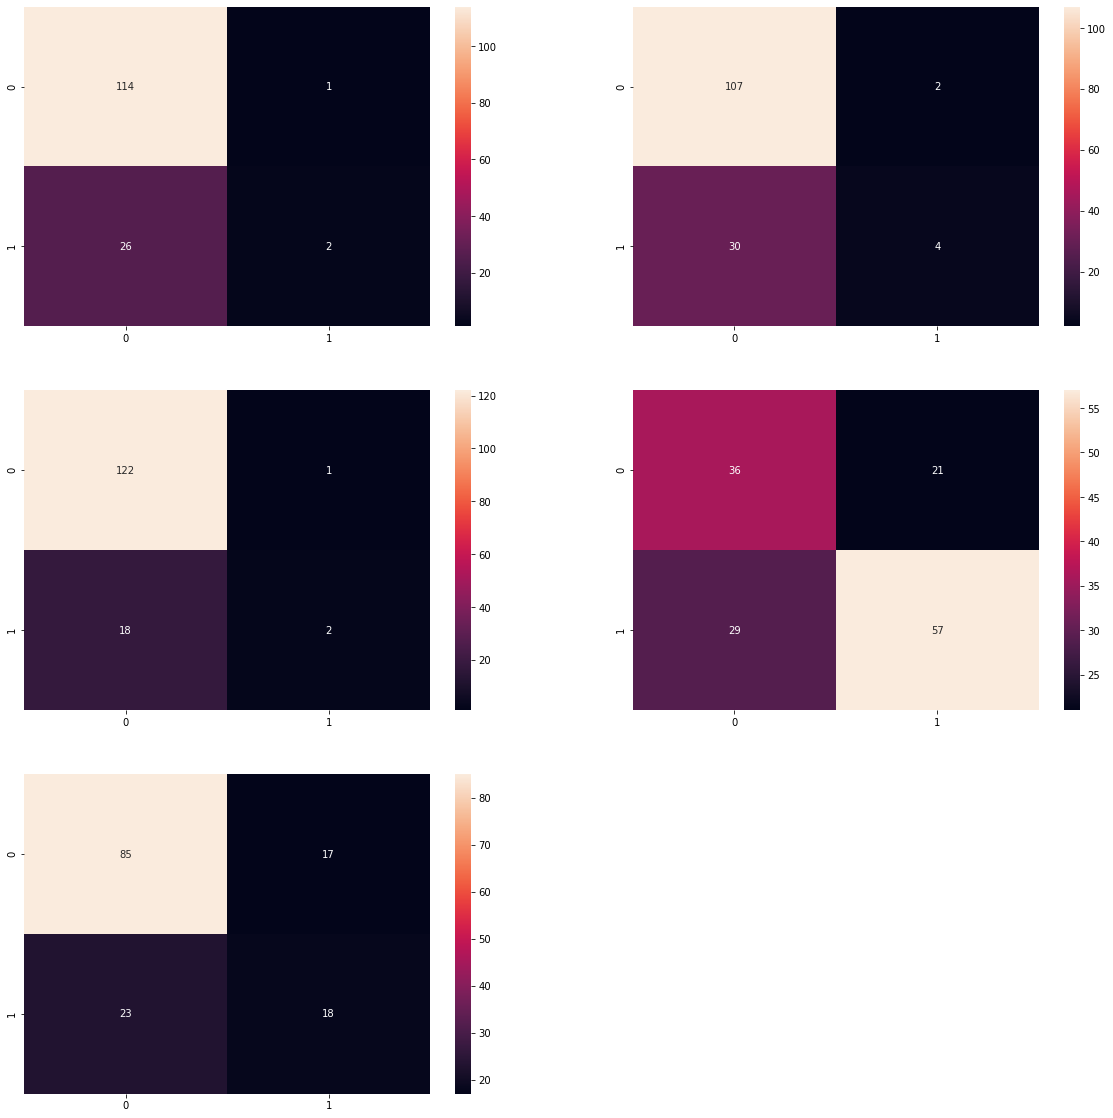

In [298]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.heatmap(pd.DataFrame(matrix[0]), annot=True, fmt='g', ax = axs[0][0])
sns.heatmap(pd.DataFrame(matrix[1]), annot=True, fmt='g', ax = axs[0][1])
sns.heatmap(pd.DataFrame(matrix[2]), annot=True, fmt='g', ax = axs[1][0])
sns.heatmap(pd.DataFrame(matrix[3]), annot=True, fmt='g', ax = axs[1][1])
sns.heatmap(pd.DataFrame(matrix[4]), annot=True, fmt='g', ax = axs[2][0])
axs[2][1].set_visible(False)

## Extract Resolution Time from the Emails where s1_etr == 1

In [302]:
test = df.groupby('s1_etr')

In [310]:
pd.DataFrame(test.get_group(1.0)['s1_etr_time'])

,s1_etr_time
14,90 mins
20,hour
21,24 hours
22,4 hours
37,2 hours
41,90 mins
53,4 hrs
54,3:30 Hrs
63,90 mins
67,4 hours


In [ ]:
df['encodings'] = train_encodings['input_ids']

In [324]:
newdf = pd.DataFrame(train_encodings['input_ids'])

In [333]:
[list(x) for x in list(zip(df.s1_etr.tolist(), df.s1_no_prob.tolist()))]

[[0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 1],
 [1.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [1.0, 0],
 [1.0, 0],
 [1.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 1],
 [0.0, 1],
 [0.0, 1],
 [0.0, 1],
 [0.0, 1],
 [0.0, 1],
 [0.0, 0],
 [1.0, 1],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [1.0, 0],
 [0.0, 1],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 1],
 [0.0, 1],
 [1.0, 0],
 [1.0, 0],
 [0.0, 1],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 1],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [1.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [1.0, 0],
 [0.0, 0],
 [1.0, 0],
 [0.0, 0],
 [1.0, 0],
 [0.0, 1],
 [1.0, 1],
 [1.0, 0],
 [0.0, 0],
 [1.0, 0],
 [1.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 0],
 [0.0, 1],
 [0.0, 1],
 [0.0, 1],
 [0.0, 0],
 [1.0, 0],
 [0.0, 1],
 [0.0, 0],
 [1.0, 0],

In [326]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [327]:
forest = RandomForestClassifier(random_state=1)

In [328]:
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [329]:
multi_target_forest.fit(newdf, df['labels'])

ValueError: You appear to be using a legacy multi-label data representation. Sequence of sequences are no longer supported; use a binary array or sparse matrix instead - the MultiLabelBinarizer transformer can convert to this format.